In [ ]:
!pip install torch

### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from google.colab import drive
drive.mount('/content/gdrive/MyDrive')

Mounted at /content/gdrive/ENGR96


### Download training and testing data

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = torchvision.datasets.MNIST('/content/gdrive/MyDrive/DigitClassifier', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('/content/gdrive/MyDrive/DigitClassifier', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

### Create dataloaders and visualize some examples

torch.Size([64, 1, 28, 28])
torch.Size([64])


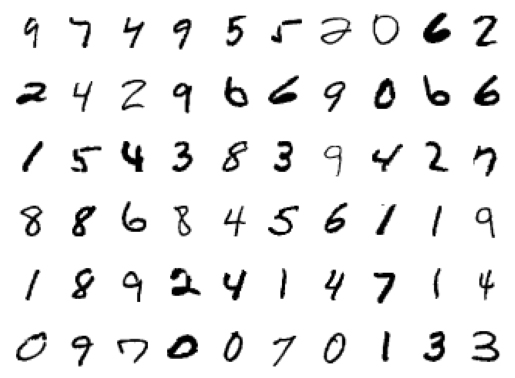

In [3]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Model Initialization

In [4]:
class Digit_Classifier2(nn.Module):
  def __init__(self):

    super().__init__()
    
    self.linear1 = nn.Linear(28*28, 100) 
    self.linear2 = nn.Linear(100, 50) 
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()
    self.activation = nn.LogSoftmax(dim=1)
  def forward(self, x):

    x = x.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    x = self.activation(x)
    return x


In [5]:
model = Digit_Classifier2()

DATA AUGMENTATION: TRAINING WITH ROTATED AND INVERTED IMAGES

torch.Size([64, 1, 28, 28])
torch.Size([64])


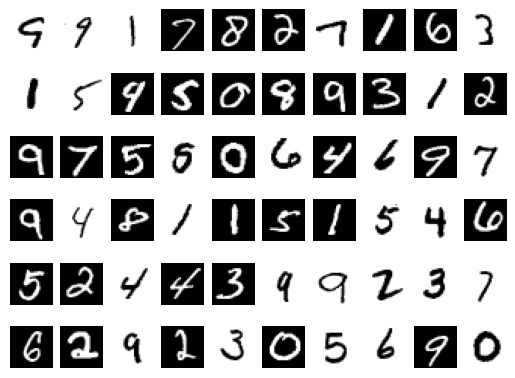

In [20]:
#INVERT COLOR OF MINST DATA SET
transform = torchvision.transforms.Compose([torchvision.transforms.RandomInvert(p=0.5), torchvision.transforms.ToTensor()])
inverted_trainset = torchvision.datasets.MNIST('/content/gdrive/MyDrive/DigitClassifier', download=True, train=True, transform=transform)
inverted_testset = torchvision.datasets.MNIST('/content/gdrive/MyDrive/DigitClassifier', download=True, train=False, transform=transform)

inverted_trainloader = torch.utils.data.DataLoader(inverted_trainset, batch_size = 64, shuffle = True)
inverted_testloader = torch.utils.data.DataLoader(inverted_testset, batch_size = 64, shuffle = True)


inverted_dataiter = iter(inverted_trainloader)
inverted_images, inverted_labels = next(inverted_dataiter)


print(inverted_images.shape)
print(inverted_labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(inverted_images[index].numpy().squeeze(), cmap='gray_r')

torch.Size([52, 1, 28, 28])
torch.Size([52])


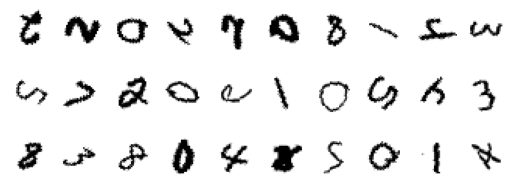

In [15]:
#GET ANOTHER DATA SET: MINST WITH RANDOM TRANSFORMATIONS
transform = torchvision.transforms.Compose([torchvision.transforms.RandomRotation(180), torchvision.transforms.ToTensor()])
second_trainset = torchvision.datasets.MNIST('/content/gdrive/MyDrive/DigitClassifier', download=True, train=True, transform=transform)
second_testset = torchvision.datasets.MNIST('/content/gdrive/MyDrive/DigitClassifier', download=True, train=False, transform=transform)

second_trainloader = torch.utils.data.DataLoader(second_trainset, batch_size = 64, shuffle = True)
second_testloader = torch.utils.data.DataLoader(second_testset, batch_size = 64, shuffle = True)


second_dataiter = iter(second_trainloader)
augmented_images, augmented_labels = next(second_dataiter)


#filter out 6s and 9s to prevent confusion
augmented_images = augmented_images[(augmented_labels != 6)]
augmented_labels = augmented_labels[(augmented_labels != 6)]
augmented_images = augmented_images[(augmented_labels != 9)]
augmented_labels = augmented_labels[(augmented_labels != 9)]


print(augmented_images.shape)
print(augmented_labels.shape)

figure = plt.figure()
num_of_images = 30
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(augmented_images[index].numpy().squeeze(), cmap='gray_r')

### Hyperparameters Tuning

In [45]:
num_epochs = 10
learning_rate = 0.001
momentum = 1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Model Training

In [46]:
running_loss = []
epoch_loss = []

inverted_running_loss = []
inverted_epoch_loss = []

augmented_running_loss = []
augmented_epoch_loss = []

# Training loop
model.train()
for epoch in range(num_epochs):
    for images, labels in trainloader:
        # Flatten the images if needed
        images = images.view(images.size(0), -1)
        
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()

        # Update the weights
        optimizer.step()

        # Track the running loss
        running_loss.append(loss.item())

    # Print the average loss for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {sum(running_loss)/len(running_loss)}")
    epoch_loss.append(sum(running_loss)/len(running_loss))


# AUGMENTED TRAINING LOOPS
    for inverted_images, inverted_labels in inverted_trainloader:
        # Flatten the images if needed
        inverted_images = inverted_images.view(inverted_images.size(0), -1)
        
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inverted_images)

        # Calculate the loss
        loss = criterion(outputs, inverted_labels)

        # Backpropagation
        loss.backward()

        # Update the weights
        optimizer.step()

        # Track the running loss
        inverted_running_loss.append(loss.item())
      

    inverted_epoch_loss.append(sum(inverted_running_loss)/len(inverted_running_loss))


    for augmented_images, augmented_labels in second_trainloader:

        # Flatten the images if needed
        augmented_images = augmented_images.view(augmented_images.size(0), -1)
        
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(augmented_images)

        # Calculate the loss
        loss = criterion(outputs, augmented_labels)

        # Backpropagation
        loss.backward()

        # Update the weights
        optimizer.step()

        # Track the running loss
        augmented_running_loss.append(loss.item())

    augmented_epoch_loss.append(sum(augmented_running_loss)/len(augmented_running_loss))

Epoch [1/10], Loss: 0.0059765241447224705
Epoch [2/10], Loss: 0.04303703572441803
Epoch [3/10], Loss: 0.04693227841924216
Epoch [4/10], Loss: 0.046848886872156624
Epoch [5/10], Loss: 0.04542412419569128
Epoch [6/10], Loss: 0.043974611349706955
Epoch [7/10], Loss: 0.04232373123956795
Epoch [8/10], Loss: 0.04063833968423218
Epoch [9/10], Loss: 0.03921531190457664
Epoch [10/10], Loss: 0.03795033277024729


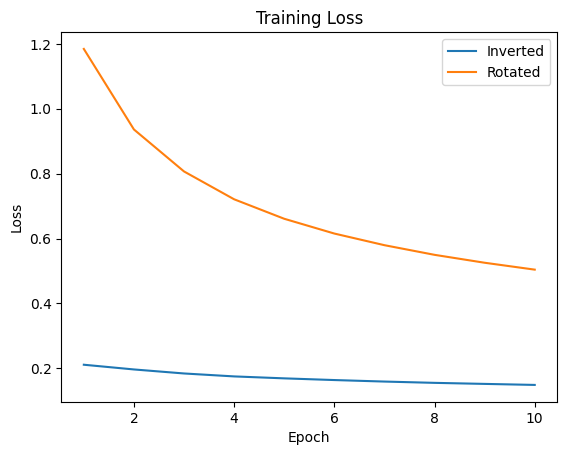

In [51]:
#code for plotting loss
#plt.plot(range(1, num_epochs + 1), epoch_loss, label="Original")
plt.plot(range(1, num_epochs + 1), inverted_epoch_loss, label="Inverted")
plt.plot(range(1, num_epochs + 1), augmented_epoch_loss, label="Rotated")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

### Save model

In [65]:
torch.save(model.state_dict(), '/content/gdrive/MyDrive/DigitClassifier/final_weights.pth')

### Evaluate Test Accuracy

In [ ]:
model.eval()
correct = 0
total = 0

# ensure gradients won't get changed
with torch.no_grad():
    for images, labels in testloader:
        for i in range(len(labels)):
            
            # Calculate the output
            output = model(images[i])

            predicted_label = torch.argmax(output)

            if predicted_label == labels[i]:
                correct += 1
            total += 1

print("Test accuracy:", correct / total)